In [2]:
import numpy as np
import matplotlib.pyplot as plt
import exact_cover 

In [3]:
#AC:
DTYPE = exact_cover.io.DTYPE_FOR_ARRAY
RAW_SHAPES = {
    "F": [[1, 1, 0], [0, 1, 1], [0, 1, 0]],
    "I": [[1, 1, 1, 1, 1]],
    "L": [[1, 0, 0, 0], [1, 1, 1, 1]],
    "N": [[1, 1, 0, 0], [0, 1, 1, 1]],
    "P": [[1, 1, 1], [1, 1, 0]],
    "T": [[1, 1, 1], [0, 1, 0], [0, 1, 0]],
    "U": [[1, 1, 1], [1, 0, 1]],
    "V": [[1, 1, 1], [1, 0, 0], [1, 0, 0]],
    "W": [[1, 0, 0], [1, 1, 0], [0, 1, 1]],
    "X": [[0, 1, 0], [1, 1, 1], [0, 1, 0]],
    "Y": [[0, 1, 0, 0], [1, 1, 1, 1]],
    "Z": [[1, 1, 0], [0, 1, 0], [0, 1, 1]],
}
PENTOMINOS = [np.array(shape, dtype=DTYPE) for shape in RAW_SHAPES.values()]

In [35]:
#AC
# Création de "all_shapes"

pieces = ["F", "I", "L", "N", "P", "T", "U", "V", "W", "X", "Y", "Z"]
all_shapes = {} # Contiendra pour chaque pièce, une liste de toutes les shapes différentes possibles
for piece in pieces:
    new_shape = np.array(RAW_SHAPES[piece])
    new_shape_transpose = new_shape.T
    all_shapes[piece] = [new_shape]
    if not np.array_equal(new_shape, new_shape_transpose):
        all_shapes[piece].append(new_shape_transpose)
    for _ in range(4): # ajout de toutes les rotations/ rotations de symétries
        new_shape = np.rot90(new_shape)
        new_shape_transpose = np.rot90(new_shape_transpose)
        if not any(np.array_equal(shape, new_shape) for shape in all_shapes[piece]): #si new_shape n'est pas identique à une déjà présente
            all_shapes[piece].append(new_shape)
        if not any(np.array_equal(shape, new_shape_transpose) for shape in all_shapes[piece]): #si new_shape n'est pas identique à une déjà présente
            all_shapes[piece].append(new_shape_transpose)


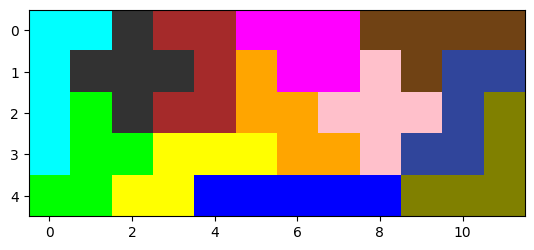

In [49]:
#AC
# Affichage couleurs
colors = np.array([[255, 0, 0], [0, 255, 0], [0, 0, 255], [0, 255, 255],[255, 255, 0], [255, 0, 255], [50, 50, 50], [165, 42, 42], [128, 128, 0],
            [255, 165, 0], [255, 192, 203], [112, 66, 20], [48,69,155]])
grille = np.array([[3, 3, 6, 7, 7, 5, 5, 5, 11, 11, 11, 11],
 [3, 6, 6, 6, 7, 9, 5, 5, 10, 11, 12, 12],
 [3, 1, 6, 7, 7, 9, 9, 10, 10, 10, 12, 8],
 [3,  1,  1,  4,  4,  4,  9,  9, 10, 12, 12,  8],
 [1,  1,  4,  4,  2,  2,  2,  2,  2,  8,  8,  8]])

def display(image):
    plt.figure()
    plt.imshow(image)

#display(colors[grille])

In [ ]:
#ER



In [ ]:
#GP



In [ ]:
#TM



